In [3]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import numpy as np

In [4]:
confirmed = pd.read_csv("data/time_series_19-covid-Confirmed.csv")
recovered = pd.read_csv("data/time_series_19-covid-Recovered.csv")
deaths = pd.read_csv("data/time_series_19-covid-Deaths.csv")
covid19 = pd.read_csv("data/covid_19_clean_complete.csv", parse_dates=['Date'])
population = pd.read_csv("data/population_clean.csv")

# Preprocessing

In [5]:
all_covid19 = covid19.sort_values(['Date','Country/Region','Province/State'])
all_covid19[['Province/State']] = all_covid19[['Province/State']].fillna('')
all_covid19[['Province/State']] = all_covid19[['Province/State']].fillna('')
all_covid19[['Confirmed', 'Deaths', 'Recovered']] = all_covid19[['Confirmed', 'Deaths', 'Recovered']].fillna(0)
countries = all_covid19['Country/Region'].unique()




[all_covid19['Date'] == all_covid19['Date'].max()]

covid19_today_regions = all_covid19[all_covid19['Date'] == all_covid19['Date'].max()]
covid19_today = covid19_today_regions.groupby('Country/Region').sum()[['Confirmed', 'Deaths', 'Recovered']]
covid19_today['PercDeath'] = 100 * covid19_today['Deaths'] / covid19_today['Confirmed']

population = population[['Country Name', '2018']]
pops = [population[population['Country Name'] == c]['2018'].values for c in countries]
pops = [p[0] if len(p) > 0 else None for p in pops]
covid19_today["Population"] = pops


covid19_today.tail()



len(countries)

114

# World analysis

### Stats

In [6]:
print("Total number of confirmed cases:", covid19_today.sum()['Confirmed'])
print("Total number of deaths:", covid19_today.sum()['Deaths'])
print("Total number of recovered cases:", covid19_today.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid19_today.sum()['Deaths'] / covid19_today.sum()['Confirmed']))

Total number of confirmed cases: 126968.0
Total number of deaths: 4647.0
Total number of recovered cases: 67014.0
% of death: 3.660%


In [7]:
# There is a cruiser ship with 696 cases and 7 deaths, that's why I removed 1
print("Number of countries with at least one case:", len(covid19_today)-1)
print("Number of countries with at least 100 case:", len(covid19_today[covid19_today['Confirmed'] > 100])-1)
print("Number of countries with at least 1 death:", len(covid19_today[covid19_today['Deaths'] > 1])-1)

Number of countries with at least one case: 113
Number of countries with at least 100 case: 24
Number of countries with at least 1 death: 17


#### Outside China

In [8]:
covid19_today_no_china = covid19_today.drop('China')
print("Total number of confirmed cases:", covid19_today_no_china.sum()['Confirmed'])
print("Total number of deaths:", covid19_today_no_china.sum()['Deaths'])
print("Total number of recovered cases:", covid19_today_no_china.sum()['Recovered'])
print("% of death: {:.3f}%".format(100 * covid19_today_no_china.sum()['Deaths'] / covid19_today_no_china.sum()['Confirmed']))

Total number of confirmed cases: 46047.0
Total number of deaths: 1486.0
Total number of recovered cases: 5370.0
% of death: 3.227%


## Confirmed case per day

#### World

([<matplotlib.axis.XTick at 0x7f26a5e745f8>,
 <a list of 6 Text xticklabel objects>)

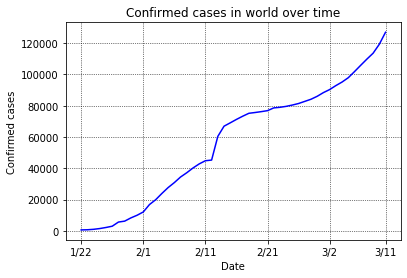

In [9]:
covid19_per_date = all_covid19.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases in world over time")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

#### Without China

([<matplotlib.axis.XTick at 0x7f26a3d649e8>,
 <a list of 6 Text xticklabel objects>)

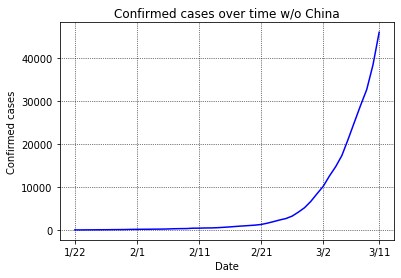

In [10]:
covid19_per_date_no_china = all_covid19[all_covid19['Country/Region'] != 'China']
covid19_per_date_no_china = covid19_per_date_no_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_no_china["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time w/o China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_no_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_no_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

#### Only China

([<matplotlib.axis.XTick at 0x7fae0896b7b8>,
 <a list of 6 Text xticklabel objects>)

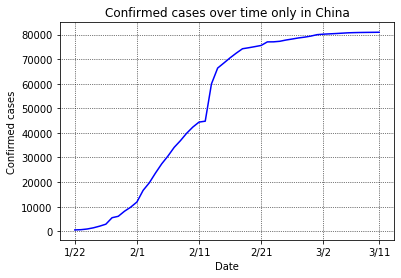

In [9]:
covid19_per_date_china = all_covid19[all_covid19['Country/Region'] == 'China']
covid19_per_date_china = covid19_per_date_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_china["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time only in China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

## Deaths per day

### World

([<matplotlib.axis.XTick at 0x7fae088db9e8>,
 <a list of 6 Text xticklabel objects>)

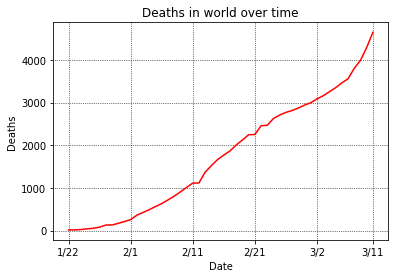

In [10]:
covid19_per_date = all_covid19.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date["Deaths"].values, color="r")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Deaths") 
plt.title("Deaths in world over time")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

### World without China

([<matplotlib.axis.XTick at 0x7fae088c0898>,
 <a list of 6 Text xticklabel objects>)

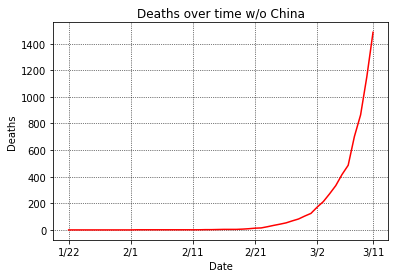

In [11]:
covid19_per_date_no_china = all_covid19[all_covid19['Country/Region'] != 'China']
covid19_per_date_no_china = covid19_per_date_no_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_no_china["Deaths"].values, color="r")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Deaths") 
plt.title("Deaths over time w/o China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_no_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_no_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

### Only in China

([<matplotlib.axis.XTick at 0x7fae08820710>,
 <a list of 6 Text xticklabel objects>)

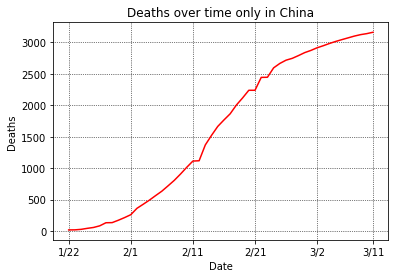

In [12]:
covid19_per_date_china = all_covid19[all_covid19['Country/Region'] == 'China']
covid19_per_date_china = covid19_per_date_china.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(covid19_per_date_china["Deaths"].values, color="r")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
# plt.axis((0.9,10.1,60,90))
# plt.legend(['Confirmed cases'], loc='upper left')
plt.xlabel("Date")
plt.ylabel("Deaths") 
plt.title("Deaths over time only in China")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(49)
ticks_name = ["{}/{}".format(covid19_per_date_china.iloc[i].name.to_pydatetime().month, 
                             covid19_per_date_china.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

## Top 15 infected countries

In [29]:
covid19_today = covid19_today.drop('Cruise Ship')
top_15 = covid19_today.sort_values('Confirmed', ascending=False)[:15]
top_15['PercPop'] = 100 * top_15['Confirmed'] / top_15['Population']
top_15.drop(columns=['Population'], inplace=True)
# top_15.to_markdown()
top_15



,Confirmed,Deaths,Recovered,PercDeath,PercPop
Country/Region,,,,,
China,80921,3161,61644,3.906279,0.005810
Italy,12462,827,1045,6.636174,0.020622
Iran,9000,354,2959,3.933333,0.011002
"Korea, South",7755,60,288,0.773694,0.015019
US,2384,68,19,2.852349,0.000729
France,2284,48,12,2.101576,0.003410
Spain,2277,54,183,2.371542,0.004873
Germany,1908,3,25,0.157233,0.002301
Switzerland,652,4,4,0.613497,0.007656


## Countries with more than 100 confirmed case and without deaths

In [14]:
no_death = covid19_today[(covid19_today['Deaths'] == 0) & (covid19_today['Confirmed'] > 100)]
no_death.drop(columns=['PercDeath', 'Population'])

,Confirmed,Deaths,Recovered
Country/Region,,,
Austria,246,0,4
Bahrain,195,0,35
Denmark,444,0,1
Israel,109,0,4
Malaysia,149,0,26
Norway,598,0,1
Qatar,262,0,0
Singapore,178,0,96


# Countries

## Italy

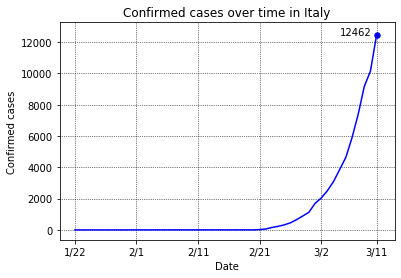

In [15]:
fig, ax = plt.subplots()
italy = all_covid19[all_covid19['Country/Region'] == 'Italy']
italy = italy.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(italy["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Italy")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(covid19_per_date_china)-1)
ticks_name = ["{}/{}".format(italy.iloc[i].name.to_pydatetime().month, 
                             italy.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

ax.annotate(str(italy["Confirmed"].values[-1]), (len(italy)-7, italy["Confirmed"].values[-1]))  
ax.scatter(len(italy)-1, italy["Confirmed"].values[-1], s=29, c="blue")

([<matplotlib.axis.XTick at 0x7fae08773a20>,
 <a list of 6 Text xticklabel objects>)

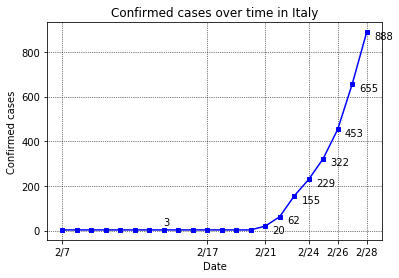

In [16]:
fig, ax = plt.subplots()
x = italy[(italy["Confirmed"] > 2) & (italy["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

ax.annotate("3", (7, 26))
for i, j in enumerate(x[14:]):
    ax.annotate(str(j), (14.5+i, j-30))    


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Italy")
ticks_pos = [0, 10, 14, 17, 19, 21]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

## France

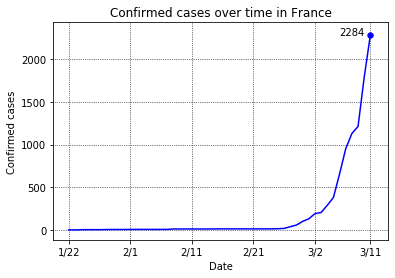

In [17]:
fig, ax = plt.subplots()
france = all_covid19[all_covid19['Country/Region'] == 'France']
france = france.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(france["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in France")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(france)-1)
ticks_name = ["{}/{}".format(france.iloc[i].name.to_pydatetime().month, 
                             france.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

ax.annotate(str(france["Confirmed"].values[-1]), (len(france)-6, france["Confirmed"].values[-1]))  
ax.scatter(len(france)-1, france["Confirmed"].values[-1], s=29, c="blue")


(-32.900000000000006, 1100)

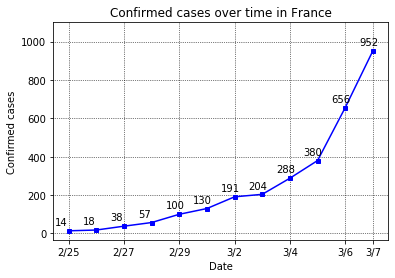

In [18]:
fig, ax = plt.subplots()
x = france[(france["Confirmed"] > 12) & (france["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

for i, j in enumerate(x):
    ax.annotate(str(j), (i-0.5, j+29.5))   


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in France")
ticks_pos = [0,2,4,6,8,10,11]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)
ax.set_ylim(top=1100)

## USA

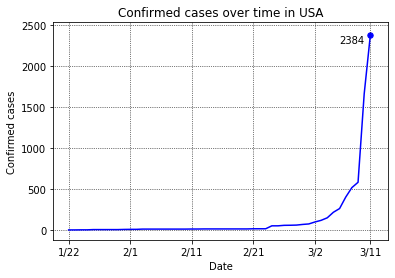

In [19]:
fig, ax = plt.subplots()
US = all_covid19[all_covid19['Country/Region'] == 'US']
US = US.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(US["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in USA")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(US)-1)
ticks_name = ["{}/{}".format(US.iloc[i].name.to_pydatetime().month, 
                             US.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

ax.annotate(str(US["Confirmed"].values[-1]), (len(US)-6, france["Confirmed"].values[-1]))  
ax.scatter(len(US)-1, US["Confirmed"].values[-1], s=29, c="blue")

(-13.400000000000002, 630)

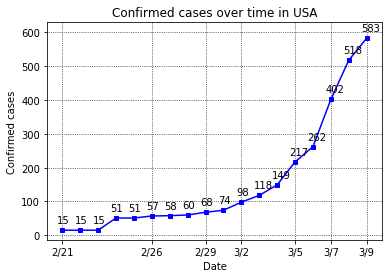

In [20]:
fig, ax = plt.subplots()
x = US[(US["Confirmed"] > 14) & (US["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

for i, j in enumerate(x):
    ax.annotate(str(j), (i-0.3, j+20.5))   


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in USA")
ticks_pos = [0,5,8,10,13,15,17]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)
ax.set_ylim(top=630)

## Germany

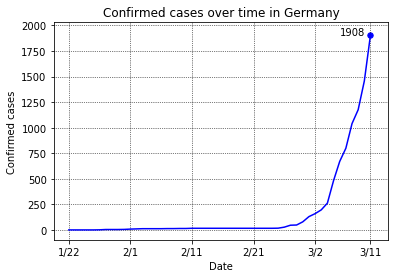

In [21]:
fig, ax = plt.subplots()
germany = all_covid19[all_covid19['Country/Region'] == 'Germany']
germany = germany.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(germany["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Germany")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(germany)-1)
ticks_name = ["{}/{}".format(germany.iloc[i].name.to_pydatetime().month, 
                             germany.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

ax.annotate(str(germany["Confirmed"].values[-1]), (len(germany)-6, germany["Confirmed"].values[-1]))  
ax.scatter(len(germany)-1, germany["Confirmed"].values[-1], s=29, c="blue")

(-11.600000000000001, 1000)

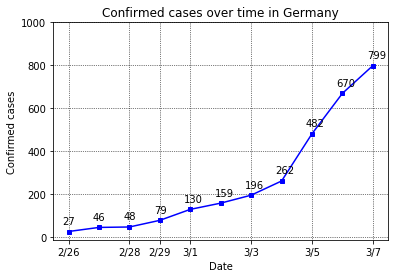

In [22]:
fig, ax = plt.subplots()
x = germany[(germany["Confirmed"] > 17) & (germany["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

for i, j in enumerate(x):
    ax.annotate(str(j), (i-0.2, j+34.5))   


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Germany")
ticks_pos = [0,2,3,4,6,8,10]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)
ax.set_ylim(top=1000)

## South Korea

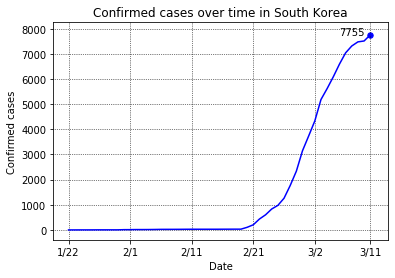

In [23]:
fig, ax = plt.subplots()
korea = all_covid19[all_covid19['Country/Region'] == 'Korea, South']
korea = korea.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(korea["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in South Korea")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(korea)-1)
ticks_name = ["{}/{}".format(korea.iloc[i].name.to_pydatetime().month, 
                             korea.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

ax.annotate(str(korea["Confirmed"].values[-1]), (len(korea)-6, korea["Confirmed"].values[-1]))  
ax.scatter(len(korea)-1, korea["Confirmed"].values[-1], s=29, c="blue")

(-18.400000000000006, 1200)

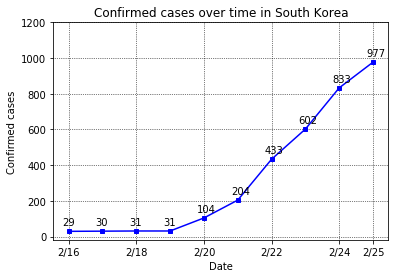

In [24]:
fig, ax = plt.subplots()
x = korea[(korea["Confirmed"] > 28) & (korea["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

for i, j in enumerate(x):
    ax.annotate(str(j), (i-0.2, j+34.5))   


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in South Korea")
ticks_pos = [0,2,4,6,8,9]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)
ax.set_ylim(top=1200)

## Iran

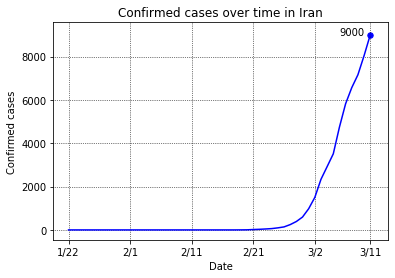

In [25]:
fig, ax = plt.subplots()
iran = all_covid19[all_covid19['Country/Region'] == 'Iran']
iran = iran.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(iran["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Iran")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(iran)-1)
ticks_name = ["{}/{}".format(iran.iloc[i].name.to_pydatetime().month, 
                             iran.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

ax.annotate(str(iran["Confirmed"].values[-1]), (len(iran)-6, iran["Confirmed"].values[-1]))  
ax.scatter(len(iran)-1, iran["Confirmed"].values[-1], s=29, c="blue")

(-46.800000000000004, 1200)

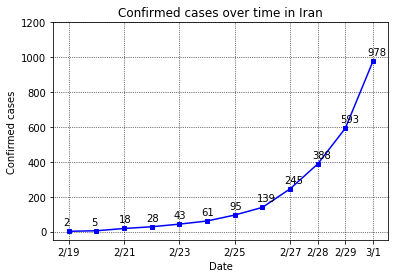

In [26]:
fig, ax = plt.subplots()
x = iran[(iran["Confirmed"] > 0) & (iran["Confirmed"] < 1000)]['Confirmed']
plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)

for i, j in enumerate(x):
    ax.annotate(str(j), (i-0.2, j+34.5))   


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Iran")
ticks_pos = [0,2,4,6,8,9,10,11]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)
ax.set_ylim(top=1200)

## Brazil

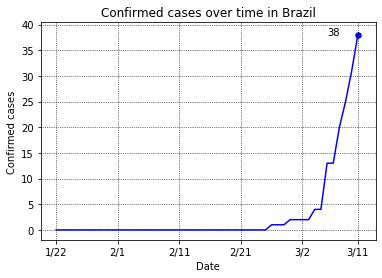

In [27]:
fig, ax = plt.subplots()
brazil = all_covid19[all_covid19['Country/Region'] == 'Brazil']
brazil = brazil.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

plt.plot(brazil["Confirmed"].values, color="b")
plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Brazil")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(brazil)-1)
ticks_name = ["{}/{}".format(brazil.iloc[i].name.to_pydatetime().month, 
                             brazil.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

ax.annotate(str(brazil["Confirmed"].values[-1]), (len(brazil)-6, brazil["Confirmed"].values[-1]))  
ax.scatter(len(brazil)-1, brazil["Confirmed"].values[-1], s=29, c="blue")

(0.34999999999999964, 90)

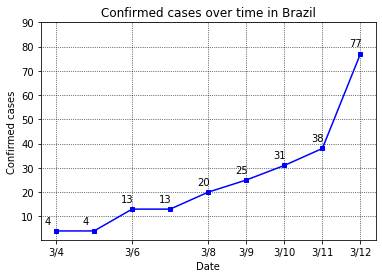

In [28]:
fig, ax = plt.subplots()
x = brazil[(brazil["Confirmed"] > 2) & (brazil["Confirmed"] < 1000)]['Confirmed']

# Adding today numbers
b = pd.Series([77], index=[pd.Timestamp('2020-03-12')])
x = x.append(b)


plt.plot([i for i in range(len(x))], x, color="b", marker='s', markersize=3.5)
for i, j in enumerate(x):
    ax.annotate(str(j), (i-0.3, j+3))   


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time in Brazil")
ticks_pos = [0, 2, 4, 5, 6, 7, 8]
ticks_name = ["{}/{}".format(x.index[i].to_pydatetime().month, 
                             x.index[i].to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)
ax.set_ylim(top=90)


## Coutries together

([<matplotlib.axis.XTick at 0x7f8af9ea5a58>,
 <a list of 6 Text xticklabel objects>)

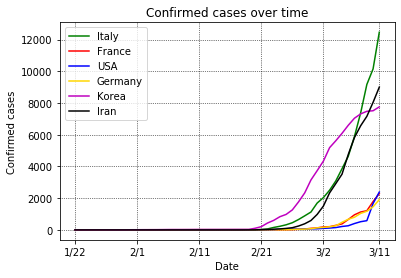

In [153]:
plt.plot(italy["Confirmed"].values, color="g")
plt.plot(france["Confirmed"].values, color="r")
plt.plot(US["Confirmed"].values, color="b")
plt.plot(germany["Confirmed"].values, color="gold")
plt.plot(korea["Confirmed"].values, color="m")
plt.plot(iran["Confirmed"].values, color="k")
plt.legend(["Italy", "France", "USA", "Germany", "Korea", "Iran"])


plt.grid(color='black', linestyle='dotted', linewidth=0.7)
plt.xlabel("Date")
plt.ylabel("Confirmed cases") 
plt.title("Confirmed cases over time")
ticks_pos = [i for i in range(0,50,10)]
ticks_pos.append(len(korea)-1)
ticks_name = ["{}/{}".format(korea.iloc[i].name.to_pydatetime().month, 
                             korea.iloc[i].name.to_pydatetime().day) for i in ticks_pos]
plt.xticks(ticks_pos, ticks_name)

In [51]:
confs = covid19_per_date_no_china['Confirmed'].values
lamb = 1/confs.mean()

def pdf(x):
    return lamb * np.exp(-lamb * x)

confs

array([    7,    10,    21,    28,    43,    50,    69,    79,    93,
         125,   147,   157,   165,   185,   195,   230,   281,   306,
         321,   408,   416,   462,   473,   527,   617,   711,   824,
         925,  1020,  1120,  1273,  1578,  1943,  2327,  2659,  3229,
        4154,  5192,  6655,  8437, 10170, 12579, 14734, 17345, 21094,
       25051, 28972, 32701, 38411, 46047])

In [55]:
pdf(0)

0.0001697412464439209

In [ ]:
import scipy.stats as st
dist_exp = st.expon.pdf(10, scale=1. / lamb)
dist_exp